# Mushroom Classification ML project
## Abdelrahman Samir

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("data/mushrooms.csv")

In [4]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Data Understanding and Bussiness Questions

## atributes descriptions

<ul>
<li><b>class</b>: edible=e, poisonous=p

<li><b>cap-shape</b>: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

<li><b>cap-surface</b>: fibrous=f,grooves=g,scaly=y,smooth=s

<li><b>cap-color</b>: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

<li><b>bruises</b>: bruises=t,no=f

<li><b>odor</b>: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

<li><b>gill-attachment</b>: attached=a,descending=d,free=f,notched=n

<li><b>gill-spacing</b>: close=c,crowded=w,distant=d

<li><b>gill-size</b>: broad=b,narrow=n

<li><b>gill-color</b>: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

<li><b>stalk-shape</b>: enlarging=e,tapering=t

<li><b>stalk-root</b>: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

<li><b>stalk-surface-above-ring</b>: fibrous=f,scaly=y,silky=k,smooth=s

<li><b>stalk-surface-below-ring</b>: fibrous=f,scaly=y,silky=k,smooth=s

<li><b>stalk-color-above-ring</b>: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

<li><b>stalk-color-below-ring</b>: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

<li><b>veil-type</b>: partial=p,universal=u

<li><b>veil-color</b>: brown=n,orange=o,white=w,yellow=y

<li><b>ring-number</b>: none=n,one=o,two=t

<li><b>ring-type</b>: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

<li><b>spore-print-color</b>: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

<li><b>population</b>: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

<li><b>habitat</b>: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d
</ul>


### what is the type of each colum?

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
for col in data.columns:
    print(col, " : ", data[col].unique())

class  :  ['p' 'e']
cap-shape  :  ['x' 'b' 's' 'f' 'k' 'c']
cap-surface  :  ['s' 'y' 'f' 'g']
cap-color  :  ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises  :  ['t' 'f']
odor  :  ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment  :  ['f' 'a']
gill-spacing  :  ['c' 'w']
gill-size  :  ['n' 'b']
gill-color  :  ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape  :  ['e' 't']
stalk-root  :  ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring  :  ['s' 'f' 'k' 'y']
stalk-surface-below-ring  :  ['s' 'f' 'y' 'k']
stalk-color-above-ring  :  ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring  :  ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type  :  ['p']
veil-color  :  ['w' 'n' 'o' 'y']
ring-number  :  ['o' 't' 'n']
ring-type  :  ['p' 'e' 'l' 'f' 'n']
spore-print-color  :  ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population  :  ['s' 'n' 'a' 'v' 'y' 'c']
habitat  :  ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [7]:
#all the colums are catigorical 

### how many rows and columns in the dataset?

In [8]:
print("number of coloums :",data.shape[1], " columns")
print("number of rows :",data.shape[0], " rows")

number of coloums : 23  columns
number of rows : 8124  rows


### how many unique values in the data sey coloums 

In [9]:
data.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

### how many null values in the data set 

In [10]:
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

### is the data set balanced ?

<AxesSubplot:xlabel='class', ylabel='Count'>

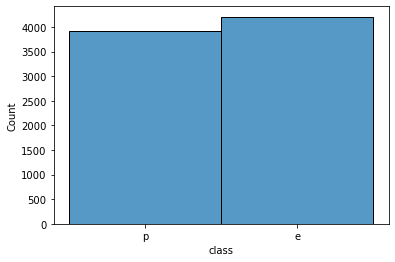

In [11]:
sns.histplot(data['class'])

In [12]:
# data set is balanced

### distribution of data 

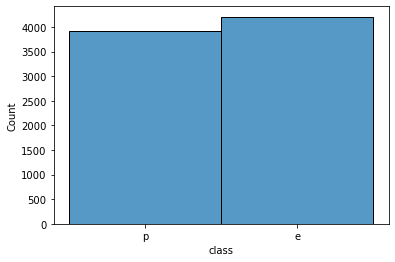

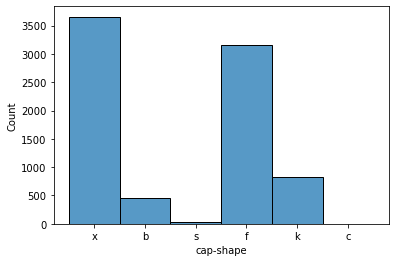

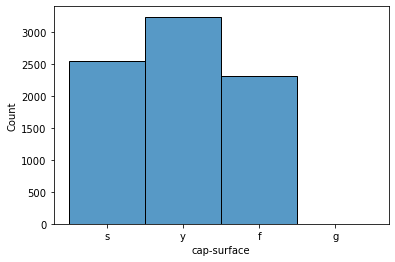

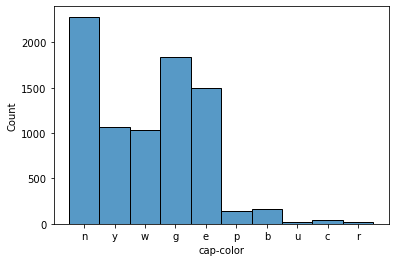

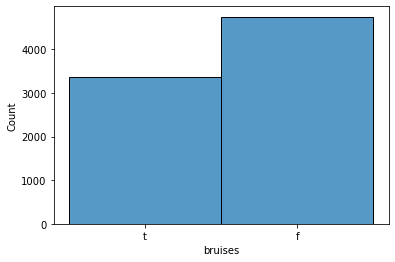

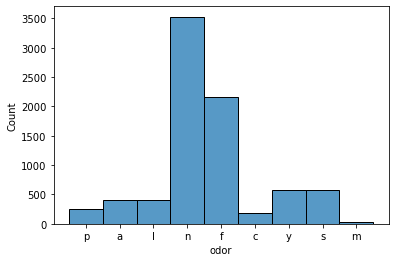

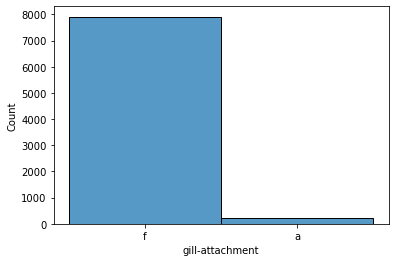

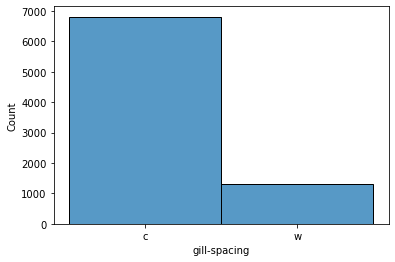

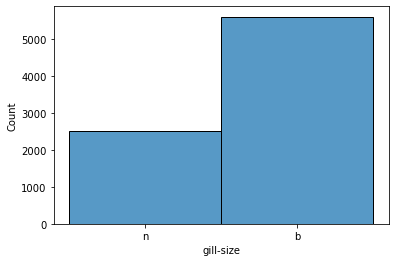

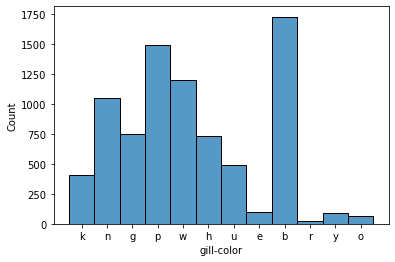

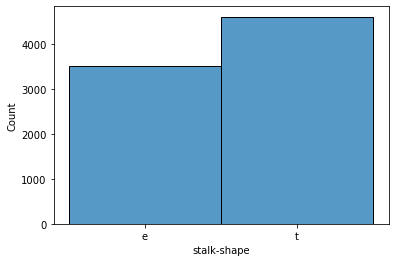

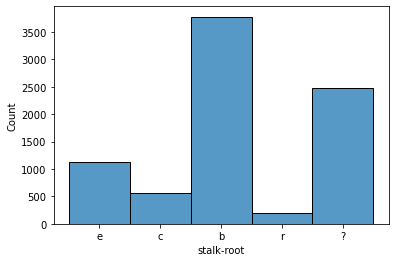

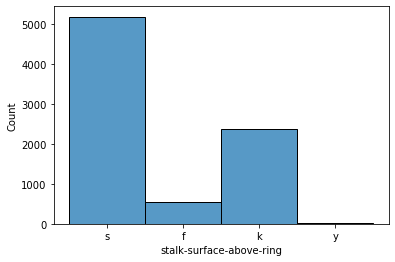

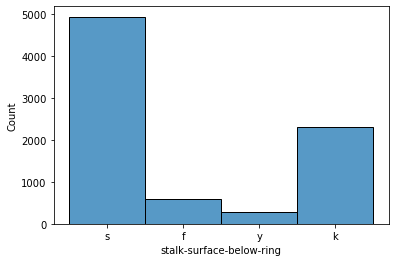

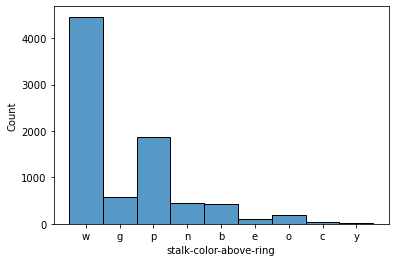

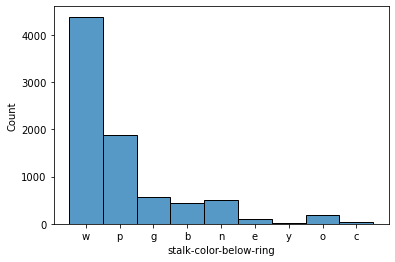

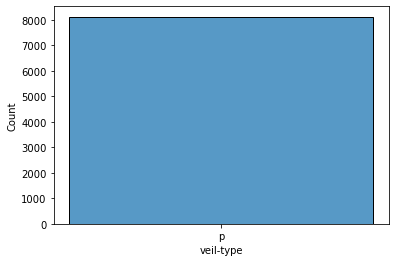

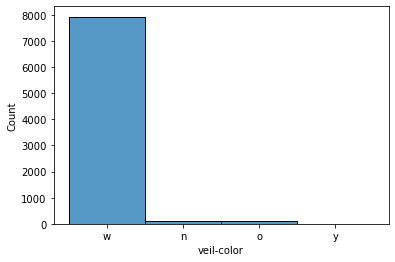

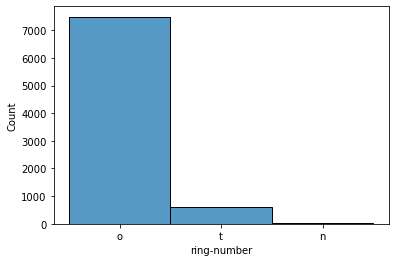

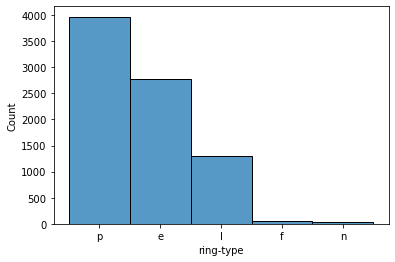

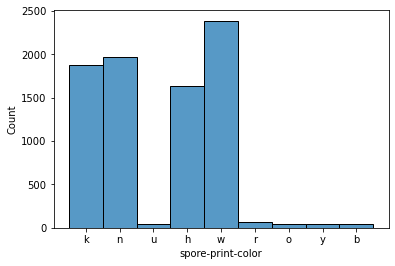

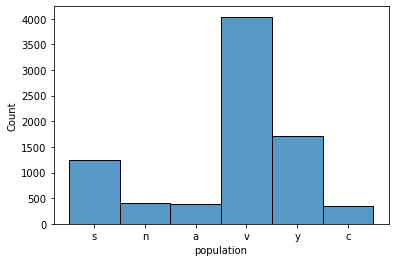

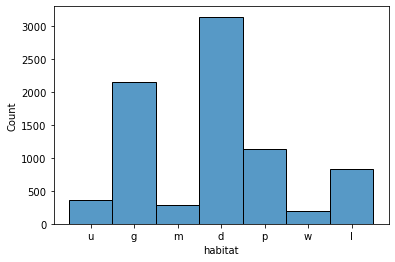

In [13]:
for column in data.columns:
    sns.histplot(data[column])
    plt.show()

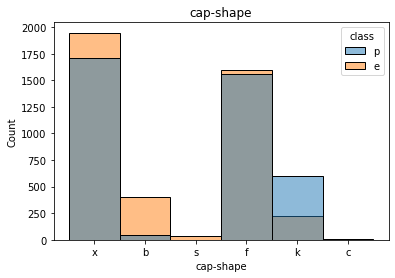

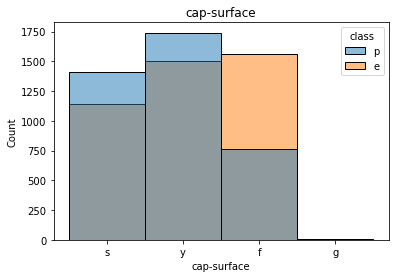

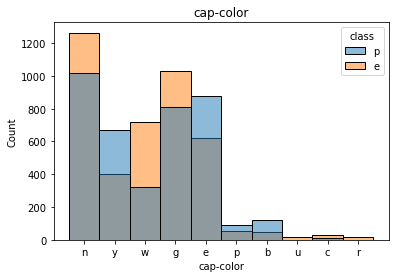

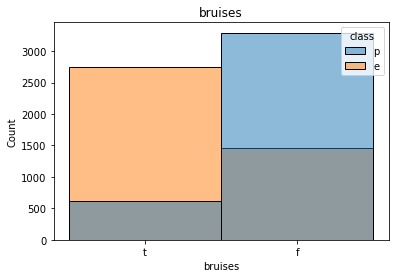

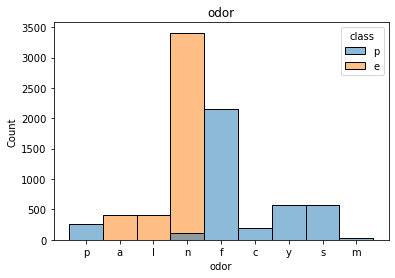

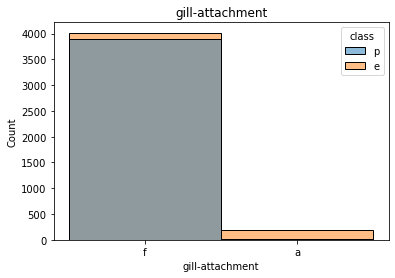

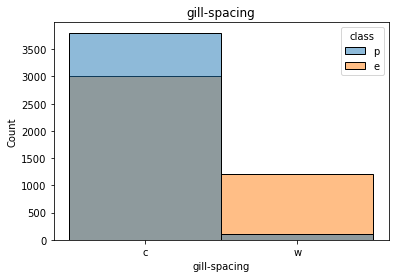

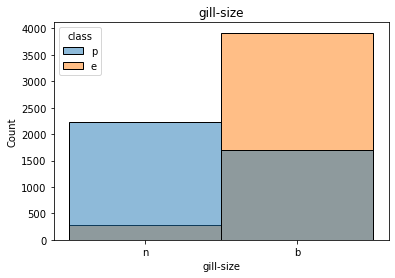

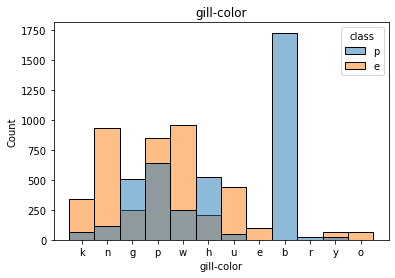

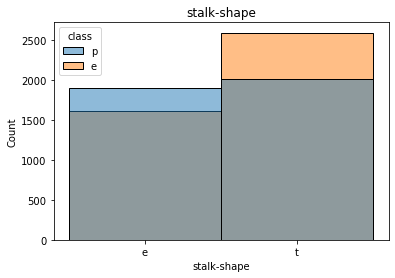

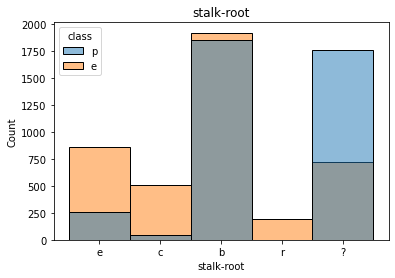

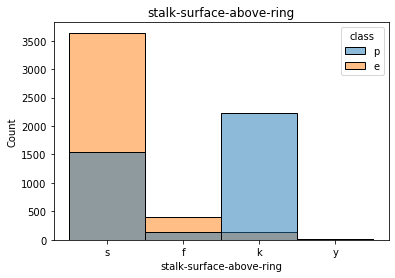

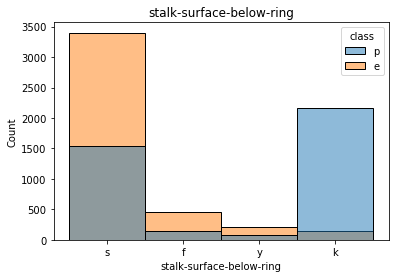

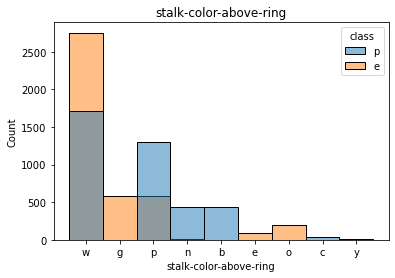

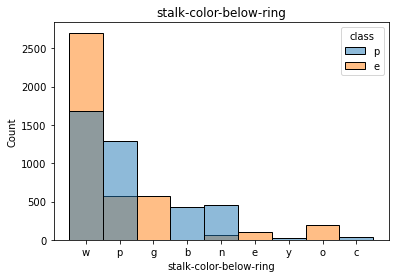

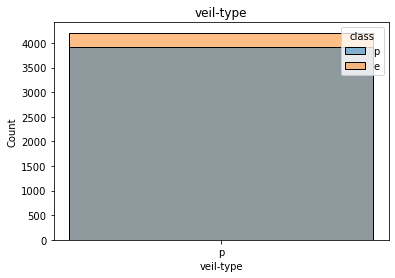

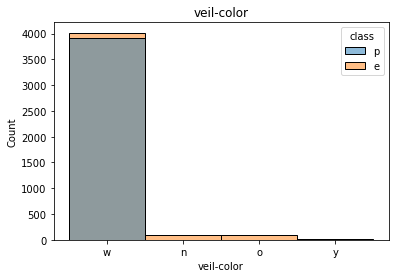

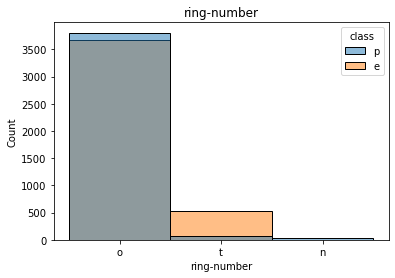

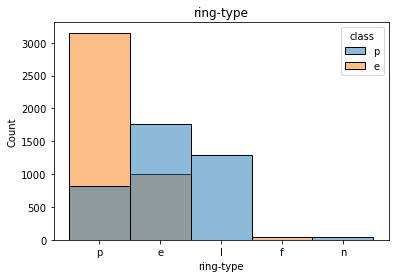

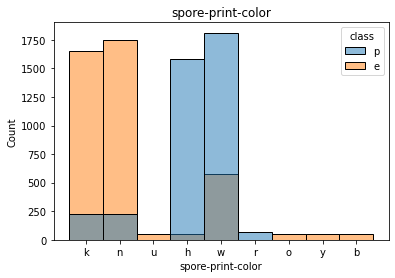

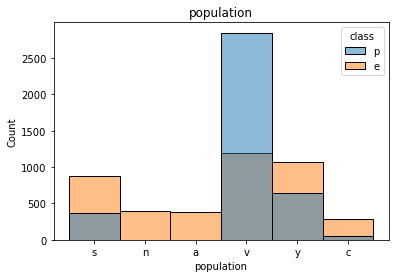

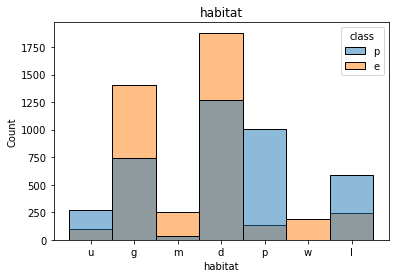

In [14]:
for feature in data.columns:
    if feature != 'class':
        plt.title(feature)
        sns.histplot(data = data , x = feature , hue = 'class')
        plt.show()

# data preprocessing

### As data is Catigorical we can use pandas funtion get_dummies() to encode the data set 

In [15]:
# make copy of the data set 
dum_data = data.copy()

In [16]:
# split the class column as we dont want to encode it 
y = data['class']
data.drop('class',axis=1)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [17]:
dum_data = pd.get_dummies(data)
dum_data.head()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [156]:
y = y.replace(to_replace = "e",value = 0)
y = y.replace(to_replace = "p",value = 1)

In [157]:
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int64

In [175]:
#spilt data 
from sklearn.model_selection import train_test_split
x_train1,x_test1 , y_train1 , y_test1 = train_test_split(dum_data , y , test_size = 0.3 , random_state = 0)
x_train1.shape, x_test1.shape

((5686, 119), (2438, 119))

using label encoder

In [176]:
from sklearn.preprocessing import LabelEncoder
data_label = data.copy()     # copy of the original data set 
le = LabelEncoder()


In [177]:
for col in df.columns:
    data_label[col] = le.fit_transform(df[col]) 
    
data_label

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [178]:
from sklearn.model_selection import train_test_split

x_train2, x_test2, y_train2, y_test2 = train_test_split(
    data_label.drop(labels=['class'], axis=1), #return the dataframe without the class atribute
    data_label['class'], 
    test_size=0.3,
    random_state=0)

x_train2.shape, x_test2.shape

((5686, 22), (2438, 22))

In [179]:
#scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train2 = sc.fit_transform(x_train2)
X_test2 = sc.transform(x_test2)

# Choosing the model 


we used two methods to encode the the data :<br>
       first with get_dummies function <br>
       seconed with label encoder and then we scaled the data
       
so we will use two ML models (Logistic Regression and KNN) for each method and see the diffrence

## First:  get_dummies function data 

### 1- Logistic Regression

In [180]:
from sklearn.linear_model import LogisticRegression
clf_log1 = LogisticRegression()
clf_log1.fit(x_train1,y_train1)

LogisticRegression()

In [181]:
clf_log1.score(x_test1,y_test1)*100

100.0

In [182]:
y_pred_log1 = clf_log1.predict(x_test1)

In [183]:
y_pred_log1

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

### 2 - KNN

In [187]:
from sklearn.neighbors import KNeighborsClassifier
clf_KNN = KNeighborsClassifier(n_neighbors=11)
clf.fit(x_train1,y_train1)

KNeighborsClassifier(n_neighbors=11)

In [188]:
clf.score(x_test1,y_test1)*100

100.0

In [190]:
y_pred_KNN1 = clf.predict(x_test1)

In [191]:
y_pred_KNN1

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

## Seconed : label encoder data 

### 1- Logistic Regression 

In [192]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x_train2,y_train2)

C:\Users\Abdelrahman Samir\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [193]:
clf.score(x_test2,y_test2)*100

94.91386382280558

In [196]:
y_pred_log2 = clf.predict(x_test2)

In [197]:
y_pred_log2

array([1, 0, 0, ..., 1, 1, 1])

### 2-KNN

In [198]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=11)
clf.fit(x_train2,y_train2)

KNeighborsClassifier(n_neighbors=11)

In [199]:
clf.score(x_test2,y_test2)*100

99.54881050041017

In [200]:
y_pred_KNN2 = clf.predict(x_test2)

In [201]:
y_pred_KNN2

array([1, 0, 0, ..., 1, 1, 1])

# Evaluation 

## 1 - logistic regression 

In [235]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import  f1_score

get_dummies data

In [204]:
cm_log1 = confusion_matrix(y_test1, y_pred_log1)
print('Confusion matrix\n', cm_log1)

Confusion matrix
 [[1272    0]
 [   0 1166]]


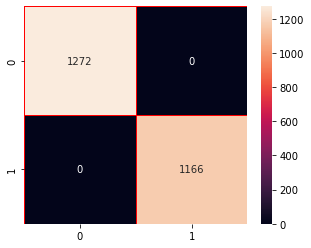

In [237]:
f,ax = plt.subplots(figsize=(5,4))
sns.heatmap(cm_log1, annot=True, linewidths=0.5,linecolor="red", fmt= '.0f',ax=ax)
plt.show()

In [210]:
print(classification_report(y_test1, y_pred_log1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1272
           1       1.00      1.00      1.00      1166

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



label encoder data

In [218]:
cm_log2 = confusion_matrix(y_test2, y_pred_log2)
print('Confusion matrix\n', cm_log2)

Confusion matrix
 [[1222   50]
 [  74 1092]]


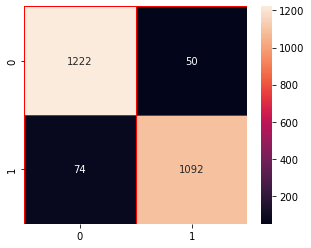

In [238]:
f,ax = plt.subplots(figsize=(5,4))
sns.heatmap(cm_log2, annot=True, linewidths=0.5,linecolor="red", fmt= '.0f',ax=ax)
plt.show()

In [216]:
print(classification_report(y_test2, y_pred_log2))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1272
           1       0.96      0.94      0.95      1166

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438



## 2- KNN

get_dummies data 

In [224]:
cm_KNN1 = confusion_matrix(y_test1, y_pred_KNN1)
print('Confusion matrix\n', cm_KNN1)

Confusion matrix
 [[1272    0]
 [   0 1166]]


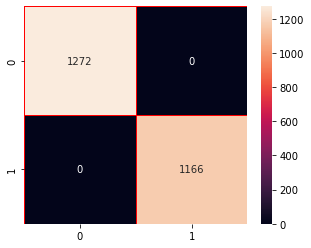

In [239]:
f,ax = plt.subplots(figsize=(5,4))
sns.heatmap(cm_KNN1, annot=True, linewidths=0.5,linecolor="red", fmt= '.0f',ax=ax)
plt.show()

In [226]:
print(classification_report(y_test1, y_pred_KNN1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1272
           1       1.00      1.00      1.00      1166

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



label encoder

In [231]:
cm_KNN2 = confusion_matrix(y_test2, y_pred_KNN2)
print('Confusion matrix\n', cm_KNN2)

Confusion matrix
 [[1266    6]
 [   5 1161]]


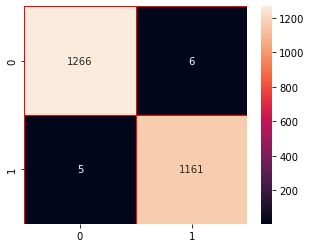

In [240]:
f,ax = plt.subplots(figsize=(5,4))
sns.heatmap(cm_KNN2, annot=True, linewidths=0.5,linecolor="red", fmt= '.0f',ax=ax)
plt.show()

In [233]:
print(classification_report(y_test2, y_pred_KNN2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1272
           1       0.99      1.00      1.00      1166

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



# conclusion 

the data which given was clean so it was easy in the preprocessing step  

I tried diffrent models and diffrent encoding methods to see which one is the best  

get_dummies function is the best encoding method in all models as it gets the heighest accuracy 

KNN model is the best in this data set as it gets the heighest accuracy in the two encoding method